In [2]:
# importation des librairies
import pandas
from Corpus import Corpus
from Classes import Documents

In [3]:
# lecture du fichier csv discours_US vu en cours pour la réalisation d'opération sur un corpus et la recherche 
df_discours =pandas.read_csv('discours_US.csv', sep ="\t")
corp = Corpus('TD8')
for index, row in df_discours.iterrows():
    phrases =row['text'].split(".")
    for k in phrases:
        if k != "":
            corp.add(Documents(row["descr"],row['speaker'],row['date'],row['link'],k))
corp.concorde('work',20)

,Contexte gauche,Motif trouvé,Contexte droit
0,it took to make it,work,But I think it's f
1,re than the typical,work,er There's somethin
2,wrong when American,work,ers keep getting mor
3,is piecing together,work,"and loans, knowing"
4,believed you had to,work,hard to make your w
...,...,...,...
2106,rump and offered to,work,with him on behalf
2107,ome we wanted or we,work,ed so hard for and I
2108,making our economy,work,for everyone not ju
2109,stand together and,work,together with respe


In [4]:
# initialisation du moteur de recherche
import Search_Engine as s
engine = s.SearchEngine(corp)

In [5]:
# recherche de mots clés dans le corpus 
engine.search("Jobs, president, money",100000)

Recherche des documents: 100%|██████████| 32305/32305 [00:00<00:00, 1170428.45it/s]


,Document,Score
0,21951,22.260612
1,11446,20.002601
2,1149,19.611866
3,23441,18.663827
4,2030,18.087482
...,...,...
32300,18170,0.000000
32301,18172,0.000000
32302,18173,0.000000
32303,18176,0.000000


In [6]:
# widget pour la recherche de mots clés

# importation des librairies
import ipywidgets as widgets
from IPython.display import display

# création des widgets (bouton, label, text, slider, output)
button = widgets.Button(
    description='click to confirm the data',
    layout={'width': '300px'}
)
l =widgets.Label("Moteur de recherche")
t =widgets.Text()
i =widgets.IntSlider(50)
out = widgets.Output()

In [7]:
# fonction pour la recherche de mots clés
def clique_bouton(event):
    query = t.value # récupération de la valeur du text
    num = i.value # récupération de la valeur du slider
    with out:
        out.clear_output()
        # appel de la fonction search du moteur de recherche
        print(engine.search(query, num))

# affichage lors du clique sur le bouton
button.on_click(clique_bouton)
display(widgets.VBox([l,t,i,button,out]))

In [8]:
# importation du corpus sur l'intelligence artificielle
import pickle
with open("../corpus_ai.pkl", "rb") as f:
    corpus = pickle.load(f)
    
# initialisation du moteur de recherche sur l'intelligence artificielle
ai_engine = s.SearchEngine(corpus)

#affichage de la matrice tf pour s'assurer de son initialisation automatique suite a la création du moteur de recherche
print(ai_engine.construire_matrice_tf())

<Compressed Sparse Row sparse matrix of dtype 'int32'
	with 5676 stored elements and shape (94, 2378)>
  Coords	Values
  (0, 0)	1
  (0, 1)	1
  (0, 2)	1
  (0, 3)	1
  (0, 4)	1
  (0, 5)	1
  (0, 6)	1
  (0, 7)	1
  (0, 8)	1
  (0, 9)	1
  (0, 10)	1
  (0, 11)	1
  (0, 12)	1
  (0, 13)	1
  (0, 14)	1
  (0, 15)	1
  (0, 16)	1
  (0, 17)	1
  (0, 18)	1
  (0, 19)	1
  (0, 20)	1
  (0, 21)	1
  (0, 22)	1
  (0, 23)	1
  (0, 24)	1
  :	:
  (93, 4)	1
  (93, 17)	1
  (93, 31)	1
  (93, 61)	1
  (93, 94)	1
  (93, 130)	1
  (93, 164)	1
  (93, 286)	1
  (93, 392)	1
  (93, 877)	1
  (93, 888)	1
  (93, 1674)	1
  (93, 2046)	1
  (93, 2060)	1
  (93, 2067)	1
  (93, 2105)	1
  (93, 2369)	1
  (93, 2370)	1
  (93, 2371)	1
  (93, 2372)	1
  (93, 2373)	1
  (93, 2374)	1
  (93, 2375)	1
  (93, 2376)	1
  (93, 2377)	1


In [9]:
# Création d'un bouton pour afficher le vocabulaire
out_vocabulaire = widgets.Output()

# Fonction pour afficher le vocabulaire
def afficher_vocabulaire(event):
    with out_vocabulaire:
        out_vocabulaire.clear_output()
        vocabulaire = ai_engine.construire_vocabulaire()
        print("Vocabulaire du corpus :")
        print(vocabulaire)

# Création du bouton
button_vocabulaire = widgets.Button(description="Afficher le vocabulaire")
button_vocabulaire.on_click(afficher_vocabulaire)

# Conteneur avec barre de défilement
scrollable_vocabulaire = widgets.Box([out_vocabulaire], layout=widgets.Layout(overflow='auto', width='100%', height='100px', border='1px solid black'))

# affichage du bouton et du conteneur avec barre de défilement pour le résultat
display(button_vocabulaire, scrollable_vocabulaire)

Button(description='Afficher le vocabulaire', style=ButtonStyle())

Box(children=(Output(),), layout=Layout(border_bottom='1px solid black', border_left='1px solid black', border…

In [10]:
# création d'un bouton pour afficher la matrice TF
out_matrice_tf = widgets.Output()

# Fonction pour afficher la matrice TF
def afficher_matrice_tf(event):
    with out_matrice_tf:
        out_matrice_tf.clear_output()
        print("Matrice TF :")
        display(ai_engine.matrice_tf_df.head())

# Création du bouton
button_matrice_tf = widgets.Button(description="Afficher la matrice TF")
button_matrice_tf.on_click(afficher_matrice_tf)

# Conteneur avec barre de défilement
scrollable_matrice_tf = widgets.Box([out_matrice_tf], layout=widgets.Layout(overflow='auto', width='100%', height='300px', border='1px solid black'))

# Affichage du bouton et du conteneur avec barre de défilement pour le résultat
display(button_matrice_tf, scrollable_matrice_tf)

Button(description='Afficher la matrice TF', style=ButtonStyle())

Box(children=(Output(),), layout=Layout(border_bottom='1px solid black', border_left='1px solid black', border…

In [11]:
# Widgets Output pour capturer les résultats
out_freq_doc = widgets.Output()
out_total_occurrences = widgets.Output()

# Fonction pour afficher la fréquence documentaire
def afficher_freq_doc(event):
    with out_freq_doc:
        out_freq_doc.clear_output()
        doc_freq = ai_engine.calculer_doc_freq()
        print("Fréquence documentaire (nombre de documents contenant chaque terme) :")
        display(doc_freq)
        
# Fonction pour afficher le nombre total d'occurrences
def afficher_total_occurrences(event):
    with out_total_occurrences:
        out_total_occurrences.clear_output()
        total_occurrences = ai_engine.calculer_total_occurrences()
        print("Nombre total d'occurrences de chaque terme dans le corpus :")
        display(total_occurrences)


# Boutons pour déclencher les fonctions
button_freq_doc = widgets.Button(description="Afficher la fréquence documentaire")
button_freq_doc.on_click(afficher_freq_doc)

button_total_occurrences = widgets.Button(description="Afficher le nombre total d'occurrences")
button_total_occurrences.on_click(afficher_total_occurrences)

# Afficher les boutons et les résultats ensemble dans un vbox
display(widgets.VBox([button_freq_doc, out_freq_doc, button_total_occurrences, out_total_occurrences]))

In [12]:
# Création d'un bouton pour afficher la matrice TF-IDF
out_matrice_tfidf = widgets.Output()

# Fonction pour afficher la matrice TF-IDF
def afficher_matrice_tfidf(event):
    with out_matrice_tfidf:
        out_matrice_tfidf.clear_output()
        print("Matrice TF-IDF :")
        display(ai_engine.mat_TFxIDF_df.head())

# Création du bouton
button_matrice_tfidf = widgets.Button(description="Afficher la matrice TF-IDF")
button_matrice_tfidf.on_click(afficher_matrice_tfidf)

# Conteneur avec barre de défilement
scrollable_matrice_tfidf = widgets.Box([out_matrice_tfidf], layout=widgets.Layout(overflow='auto', width='100%', height='300px', border='1px solid black'))

# Affichage du bouton et du conteneur avec barre de défilement pour le résultat
display(button_matrice_tfidf, scrollable_matrice_tfidf)

Button(description='Afficher la matrice TF-IDF', style=ButtonStyle())

Box(children=(Output(),), layout=Layout(border_bottom='1px solid black', border_left='1px solid black', border…

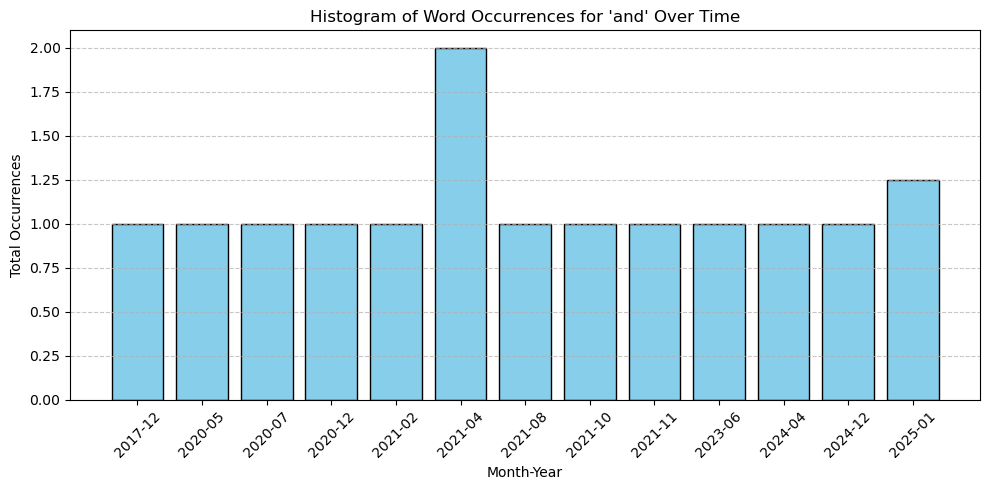

{3: 1, 4: 1, 5: 1, 7: 1, 10: 1, 11: 1, 12: 1, 15: 2, 16: 1, 17: 1, 19: 1, 20: 1, 21: 1, 22: 1, 23: 2, 26: 2, 27: 1, 28: 1, 29: 1, 31: 1, 35: 1, 36: 1, 37: 1, 38: 1, 39: 1, 40: 1, 42: 1, 45: 1, 47: 1, 53: 2, 54: 1, 55: 1, 56: 1, 57: 1, 58: 1, 59: 1, 60: 1, 91: 1, 92: 1}


In [13]:
# timeline pour le mot "and" dans le corpus 
print(ai_engine.timeline("and"))

In [14]:
# création des widgets (bouton, label, text, slider, output)
button = widgets.Button(
    description='click to confirm the data',
    layout={'width': '300px'}
)
l =widgets.Label("Moteur de recherche")
t =widgets.Text()
out = widgets.Output()

# fonction pour la recherche de mots clés
def clique_bouton(event):
    query = t.value # récupération de la valeur du text
    with out:
        out.clear_output()
        # appel de la fonction search du moteur de recherche
        print(engine.timeline(query))

# affichage lors du clique sur le bouton
button.on_click(clique_bouton)
display(widgets.VBox([l,t,button,out]))